In [1]:
#define lstm model
import torch
from torch.nn import *
import torch.nn.functional as F
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from utils import *

In [3]:
T=30

In [4]:
etfs = ['XLB','XLE','XLF','XLI','XLP','XLV','XLY','XLU']
metrics = ["ATR","SD_Log_Close"]
start = '2001-01-01'
end = '2022-01-01'
start_t = '2023-01-01'
end_t = '2024-01-05'
models = {}
lrs = [0]

[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLB
Number of neg. ATR: 0
On the 31th day, Bought 121 shares for $9923.210000000001
On the 32th day, Bought 0 shares for $0.0
On the 33th day, Bought 0 shares for $0.0
On the 34th day, Bought 0 shares for $0.0
On the 35th day, Bought 0 shares for $0.0
On the 36th day, Bought 0 shares for $0.0
On the 37th day, Bought 0 shares for $0.0
On the 38th day, Bought 0 shares for $0.0
On the 56th day, Bought 0 shares for $0.0
On the 57th day, Bought 0 shares for $0.0
On the 58th day, Bought 0 shares for $0.0
On the 59th day, Bought 0 shares for $0.0
On the 60th day, Bought 0 shares for $0.0
On the 61th day, Bought 0 shares for $0.0
On the 62th day, Bought 0 shares for $0.0
On the 117th day, Bought 0 shares for $0.0
On the 118th day, Bought 0 shares for $0.0
On the 126th day, Bought 0 shares for $0.0
On the 127th day, Bought 0 shares for $0.0
On the 128th day, Bought 0 shares for $0.0
On the 129th day, Bought 0 shares for $0.0
On the 130th day, Bought 0 share

[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLE
Number of neg. ATR: 0
XLE Final Value: 10000.0, Final Money: 10000, Final Shares: 0.0


[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLF
Number of neg. ATR: 0
On the 211th day, Bought 289 shares for $9987.84
On the 212th day, Bought 0 shares for $0.0
On the 238th day, sold 289.0 shares for $10834.61
XLF Final Value: 10846.77, Final Money: 10846.77, Final Shares: 0.0


[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLI
Number of neg. ATR: 0
On the 34th day, Bought 96 shares for $9959.039999999999
On the 35th day, Bought 0 shares for $0.0
On the 36th day, Bought 0 shares for $0.0
On the 38th day, Bought 0 shares for $0.0
On the 45th day, sold 96.0 shares for $9473.28
On the 97th day, Bought 94 shares for $9508.1
On the 104th day, Bought 0 shares for $0.0
On the 105th day, Bought 0 shares for $0.0
On the 106th day, Bought 0 shares for $0.0
On the 107th day, Bought 0 shares for $0.0
On the 108th day, Bought 0 shares for $0.0
On the 109th day, Bought 0 shares for $0.0
On the 112th day, Bought 0 shares for $0.0
On the 113th day, Bought 0 shares for $0.0
On the 114th day, Bought 0 shares for $0.0
On the 115th day, Bought 0 shares for $0.0
On the 116th day, Bought 0 shares for $0.0
On the 117th day, Bought 0 shares for $0.0
On the 118th day, Bought 0 shares for $0.0
On the 119th day, Bought 0 shares for $0.0
On the 120th day, Bought 0 shares for $0.0
On the 128th da

[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLP
Number of neg. ATR: 0
On the 36th day, Bought 139 shares for $9999.66
On the 38th day, Bought 0 shares for $0.0
On the 53th day, Bought 0 shares for $0.0
On the 54th day, Bought 0 shares for $0.0
On the 55th day, Bought 0 shares for $0.0
On the 56th day, Bought 0 shares for $0.0
On the 57th day, Bought 0 shares for $0.0
On the 58th day, Bought 0 shares for $0.0
On the 59th day, Bought 0 shares for $0.0
On the 60th day, Bought 0 shares for $0.0
On the 61th day, Bought 0 shares for $0.0
On the 91th day, sold 139.0 shares for $10172.02
On the 125th day, Bought 137 shares for $10138.0
On the 127th day, Bought 0 shares for $0.0
On the 128th day, Bought 0 shares for $0.0
On the 141th day, sold 137.0 shares for $10236.64
On the 160th day, Bought 142 shares for $10225.42
On the 184th day, sold 142.0 shares for $9475.66
On the 221th day, Bought 135 shares for $9454.05
On the 237th day, sold 135.0 shares for $9614.7
XLP Final Value: 9681.890000000001, Fi

[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLV
Number of neg. ATR: 0
On the 33th day, Bought 77 shares for $9881.410000000002
On the 34th day, Bought 0 shares for $0.0
On the 35th day, Bought 0 shares for $0.0
On the 36th day, Bought 0 shares for $0.0
On the 41th day, sold 77.0 shares for $9726.64
On the 86th day, Bought 75 shares for $9805.5
On the 116th day, Bought 0 shares for $0.0
On the 117th day, Bought 0 shares for $0.0
On the 119th day, Bought 0 shares for $0.0
On the 120th day, Bought 0 shares for $0.0
On the 121th day, Bought 0 shares for $0.0
On the 122th day, Bought 0 shares for $0.0
On the 123th day, Bought 0 shares for $0.0
On the 124th day, Bought 0 shares for $0.0
On the 125th day, Bought 0 shares for $0.0
On the 144th day, Bought 0 shares for $0.0
On the 148th day, Bought 0 shares for $0.0
On the 149th day, Bought 0 shares for $0.0
On the 150th day, Bought 0 shares for $0.0
On the 151th day, Bought 0 shares for $0.0
On the 152th day, Bought 0 shares for $0.0
On the 153th da

[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLY
Number of neg. ATR: 0
On the 30th day, Bought 68 shares for $9897.400000000001
On the 31th day, Bought 0 shares for $0.0
On the 32th day, Bought 0 shares for $0.0
On the 33th day, Bought 0 shares for $0.0
On the 34th day, Bought 0 shares for $0.0
On the 35th day, Bought 0 shares for $0.0
On the 36th day, Bought 0 shares for $0.0
On the 37th day, Bought 0 shares for $0.0
On the 38th day, Bought 0 shares for $0.0
On the 39th day, Bought 0 shares for $0.0
On the 40th day, Bought 0 shares for $0.0
On the 44th day, Bought 0 shares for $0.0
On the 45th day, Bought 0 shares for $0.0
On the 46th day, Bought 0 shares for $0.0
On the 47th day, Bought 0 shares for $0.0
On the 48th day, Bought 0 shares for $0.0
On the 49th day, Bought 0 shares for $0.0
On the 50th day, Bought 0 shares for $0.0
On the 51th day, Bought 0 shares for $0.0
On the 52th day, Bought 0 shares for $0.0
On the 53th day, Bought 0 shares for $0.0
On the 54th day, Bought 0 shares for $0

[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLU


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLU
Number of neg. ATR: 0
On the 57th day, Bought 143 shares for $9992.84
On the 59th day, Bought 0 shares for $0.0
On the 61th day, Bought 0 shares for $0.0
On the 92th day, Bought 0 shares for $0.0
On the 93th day, Bought 0 shares for $0.0
On the 104th day, Bought 0 shares for $0.0
On the 105th day, Bought 0 shares for $0.0
On the 106th day, Bought 0 shares for $0.0
On the 108th day, Bought 0 shares for $0.0
On the 126th day, Bought 0 shares for $0.0
On the 127th day, Bought 0 shares for $0.0
On the 147th day, Bought 0 shares for $0.0
On the 148th day, Bought 0 shares for $0.0
On the 149th day, Bought 0 shares for $0.0
On the 150th day, Bought 0 shares for $0.0
On the 151th day, Bought 0 shares for $0.0
On the 152th day, Bought 0 shares for $0.0
On the 179th day, sold 143.0 shares for $8035.17
On the 211th day, Bought 130 shares for $8035.3
On the 215th day, Bought 0 shares for $0.0
On the 219th day, Bought 0 shares for $0.0
On the 220th day, Bou

[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLB
Number of neg. ATR: 0
On the 34th day, Bought 118 shares for $9943.859999999999
On the 98th day, sold 118.0 shares for $9323.18
On the 127th day, Bought 111 shares for $9310.68
On the 128th day, Bought 0 shares for $0.0
On the 156th day, Bought 0 shares for $0.0
On the 162th day, sold 111.0 shares for $9070.92
On the 219th day, Bought 112 shares for $9074.24
On the 220th day, Bought 0 shares for $0.0
On the 221th day, Bought 0 shares for $0.0
On the 222th day, Bought 0 shares for $0.0


[*********************100%***********************]  1 of 1 completed

XLB Final Value: 9495.720000000001, Final Money: 65.32000000000153, Final Shares: 112.0
read  5284  lines of data for ticker:  XLE



[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLE
Number of neg. ATR: 0
On the 133th day, Bought 115 shares for $9960.15
On the 134th day, Bought 0 shares for $0.0


[*********************100%***********************]  1 of 1 completed

On the 222th day, Bought 0 shares for $0.0
XLE Final Value: 9770.0, Final Money: 39.850000000000364, Final Shares: 115.0
read  5284  lines of data for ticker:  XLF



[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLF
Number of neg. ATR: 0
On the 105th day, Bought 302 shares for $9996.2
On the 107th day, Bought 0 shares for $0.0
On the 148th day, sold 302.0 shares for $10264.980000000001
XLF Final Value: 10268.78, Final Money: 10268.78, Final Shares: 0.0


[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLI
Number of neg. ATR: 0
On the 55th day, Bought 98 shares for $9939.16
On the 56th day, Bought 0 shares for $0.0
On the 65th day, Bought 0 shares for $0.0
On the 66th day, Bought 0 shares for $0.0
On the 67th day, Bought 0 shares for $0.0
On the 68th day, Bought 0 shares for $0.0
On the 156th day, sold 98.0 shares for $10606.54
On the 219th day, Bought 100 shares for $10589.0
On the 220th day, Bought 0 shares for $0.0
On the 221th day, Bought 0 shares for $0.0
XLI Final Value: 11208.380000000001, Final Money: 78.38000000000102, Final Shares: 100.0


[*********************100%***********************]  1 of 1 completed


read  5284  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLP
Number of neg. ATR: 0
On the 57th day, Bought 132 shares for $9930.36
On the 58th day, Bought 0 shares for $0.0
On the 59th day, Bought 0 shares for $0.0
On the 98th day, sold 132.0 shares for $9632.039999999999


[*********************100%***********************]  1 of 1 completed

XLP Final Value: 9701.679999999998, Final Money: 9701.679999999998, Final Shares: 0.0
read  5284  lines of data for ticker:  XLV



[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLV
Number of neg. ATR: 0


[*********************100%***********************]  1 of 1 completed

XLV Final Value: 10000.0, Final Money: 10000, Final Shares: 0.0
read  5284  lines of data for ticker:  XLY



[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLY
Number of neg. ATR: 0
On the 34th day, Bought 68 shares for $9974.24
On the 55th day, Bought 0 shares for $0.0
On the 62th day, Bought 0 shares for $0.0
On the 63th day, Bought 0 shares for $0.0
On the 65th day, Bought 0 shares for $0.0
On the 66th day, Bought 0 shares for $0.0
On the 67th day, Bought 0 shares for $0.0
On the 68th day, Bought 0 shares for $0.0
On the 69th day, Bought 0 shares for $0.0
On the 70th day, Bought 0 shares for $0.0
On the 86th day, Bought 0 shares for $0.0
On the 102th day, Bought 0 shares for $0.0
On the 103th day, Bought 0 shares for $0.0
On the 104th day, Bought 0 shares for $0.0
On the 105th day, Bought 0 shares for $0.0
On the 107th day, Bought 0 shares for $0.0
On the 108th day, Bought 0 shares for $0.0
On the 109th day, Bought 0 shares for $0.0
On the 111th day, Bought 0 shares for $0.0
On the 127th day, Bought 0 shares for $0.0
On the 128th day, Bought 0 shares for $0.0
On the 129th day, Bought 0 shares for $

[*********************100%***********************]  1 of 1 completed

XLY Final Value: 11745.56, Final Money: 25.76000000000022, Final Shares: 68.0


read  5284  lines of data for ticker:  XLU


[*********************100%***********************]  1 of 1 completed


read  253  lines of data for ticker:  XLU
Number of neg. ATR: 0
On the 57th day, Bought 143 shares for $9992.84
On the 63th day, Bought 0 shares for $0.0
On the 138th day, Bought 0 shares for $0.0
On the 139th day, Bought 0 shares for $0.0
On the 147th day, Bought 0 shares for $0.0
On the 181th day, sold 143.0 shares for $8119.54
On the 219th day, Bought 129 shares for $8101.2
On the 220th day, Bought 0 shares for $0.0
On the 221th day, Bought 0 shares for $0.0
XLU Final Value: 8318.910000000002, Final Money: 25.5, Final Shares: 129.0


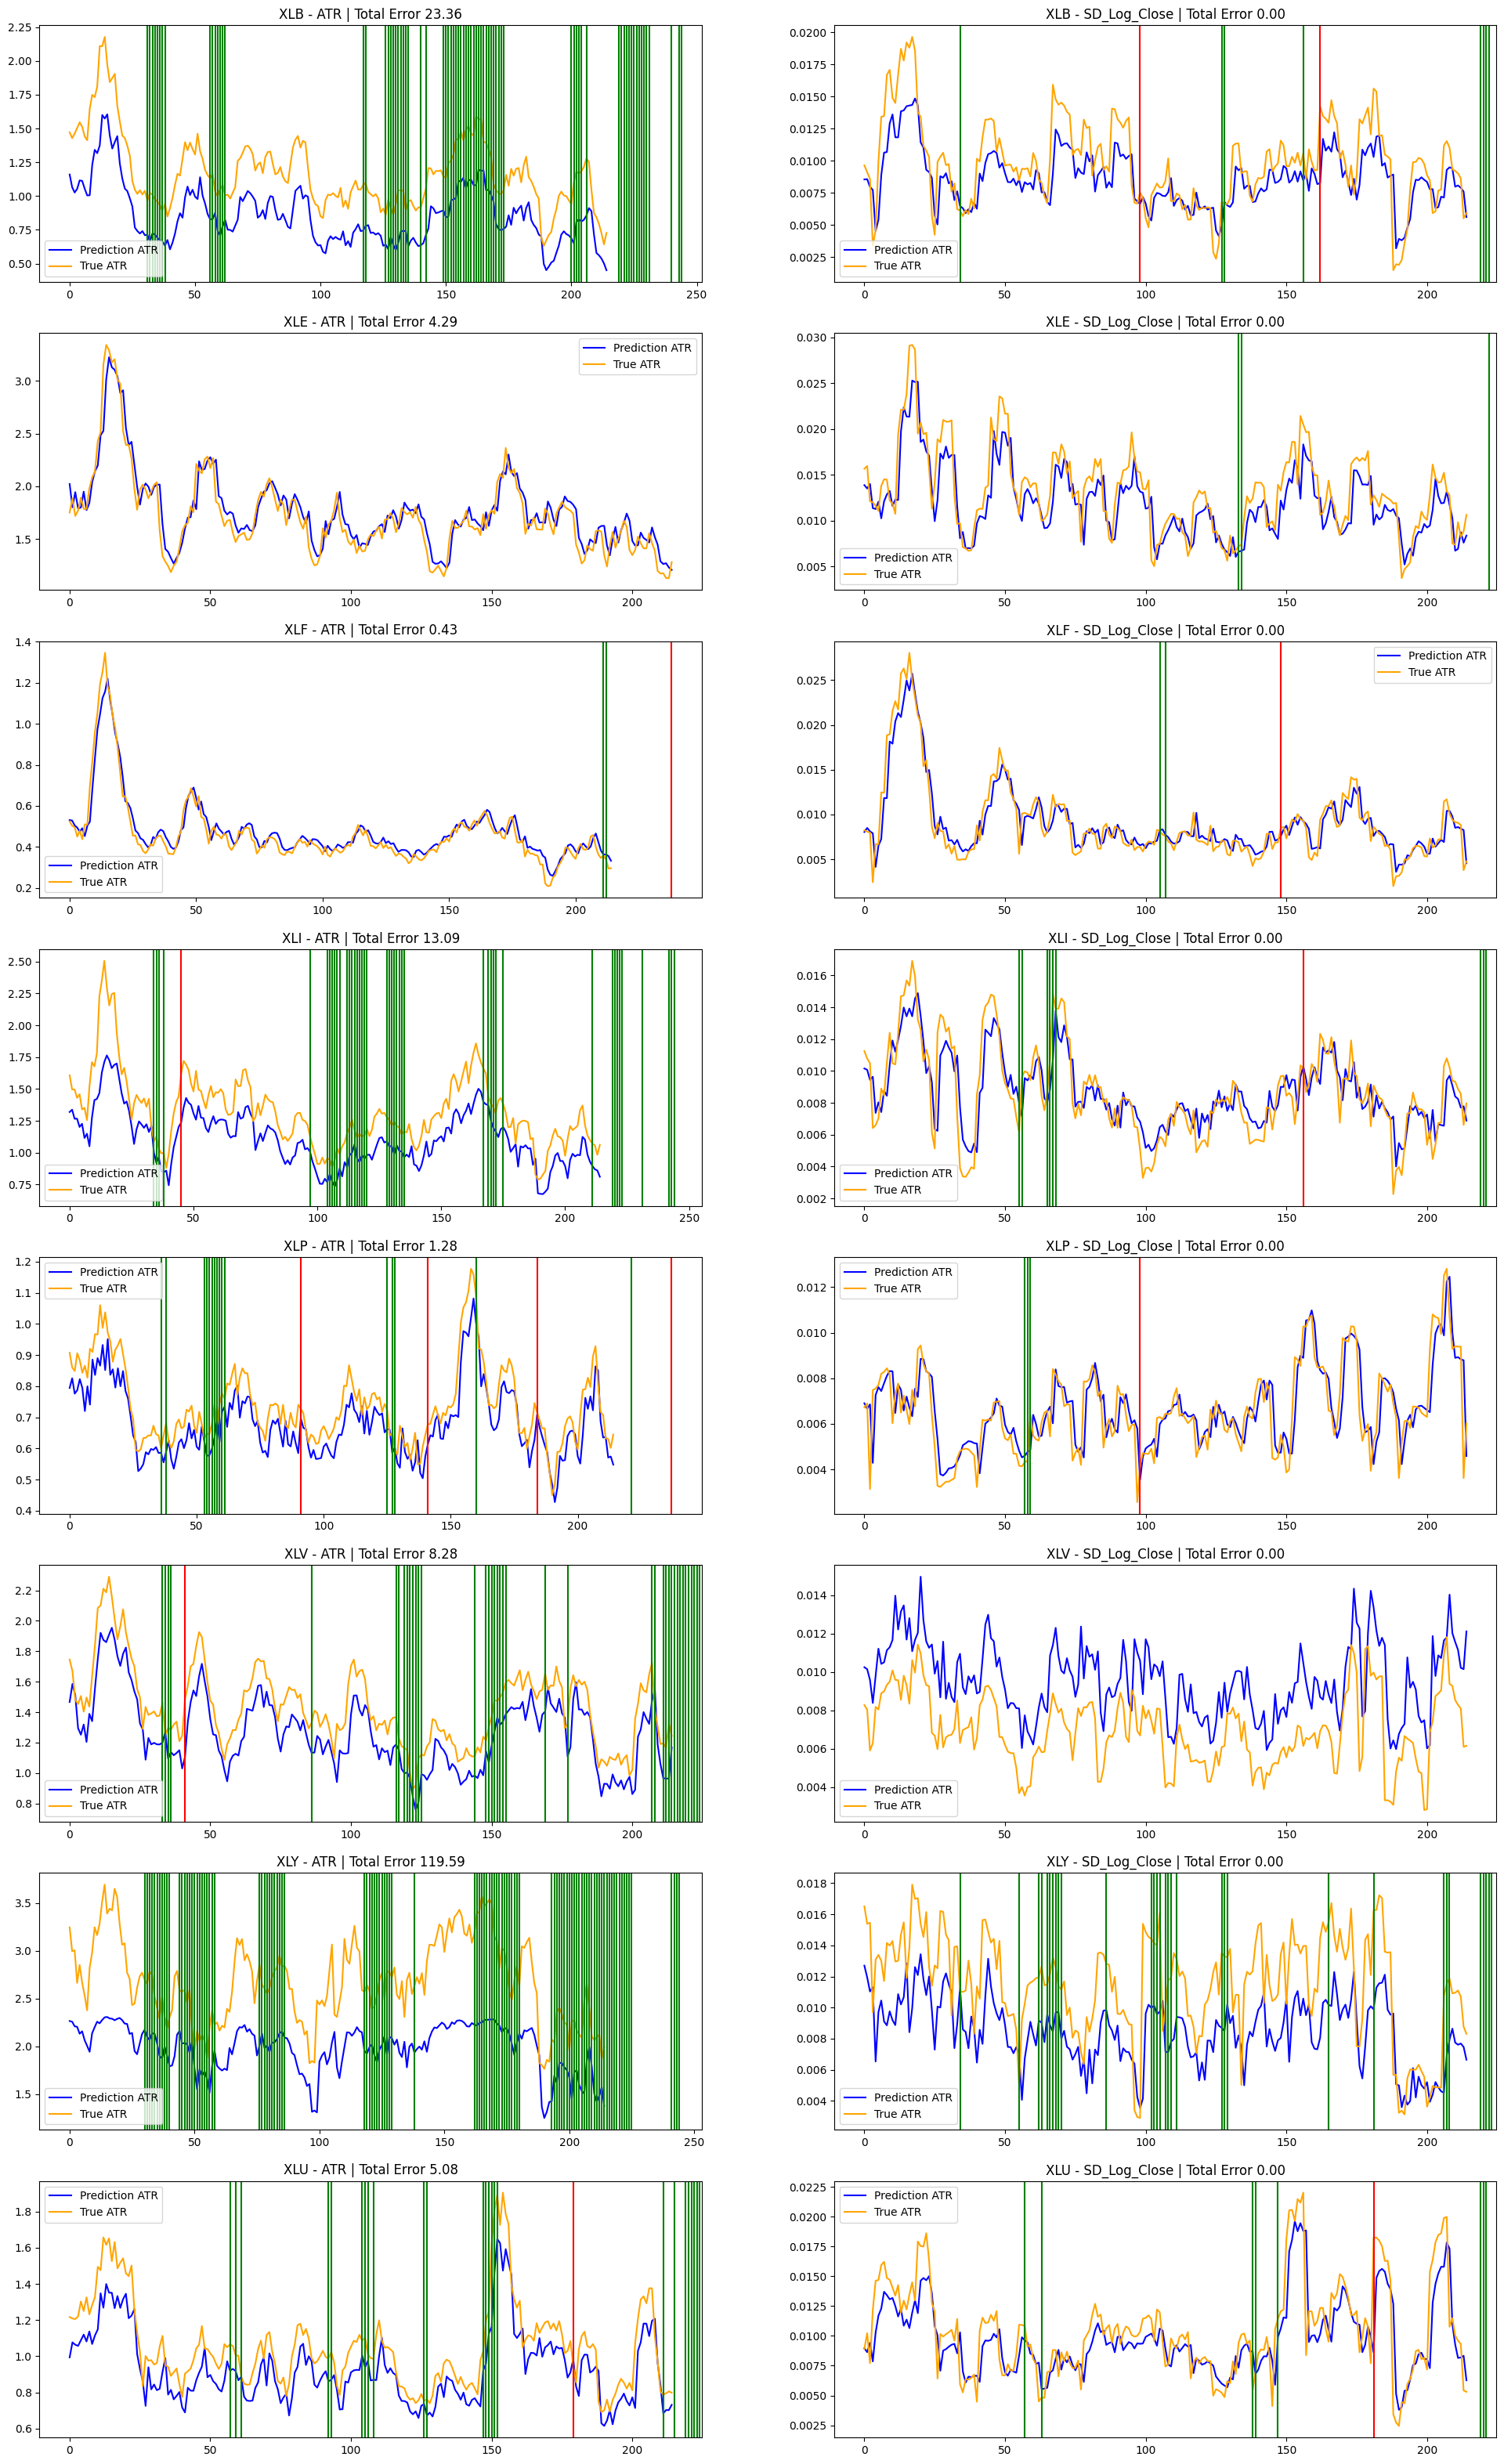

In [5]:
for lr in lrs:
    results = pd.DataFrame({"ETF":[],"Metric":[],"Final_Value":[],"Passive_Potential":[]})
    fig,ax = plt.subplots(len(etfs),len(metrics),figsize=(24,40))
    money_df_std = pd.DataFrame()
    money_df_atr = pd.DataFrame()
    money_df_passive = pd.DataFrame()
    for i,metric in enumerate(metrics):
        for j,etf in enumerate(etfs):
            scaler = StandardScaler()
            df = get_cleaned_df(etf,start,end)
            #print(df)
            model = get_trained_model(df,scaler,metric=metric)
            df_test = get_cleaned_df(etf,start_t,end_t)
            print("Number of neg. ATR:",len(df_test.loc[[atr<0 for atr in df_test["ATR"]]]))
            ini_cash = 10000
            final_value, money, shares,passive_value,buy_points,sell_points,preds, t_money,p_money = backtest_strategy(df_test,model,scaler,metric,lower_scale=1.3,upper_scale=1.7)
            print(f"{etf} Final Value: {final_value}, Final Money: {money}, Final Shares: {shares}")
            results.loc[len(results)] = [etf,metric,final_value,passive_value]
            if metric=="ATR":
               money_df_atr[etf] = t_money
            elif metric=="SD_Log_Close":
                money_df_std[etf] = t_money
                money_df_passive[f"{etf}_{metric}_Passive"] = p_money

            real_met = np.array(df_test[metric].iloc[T:len(df_test)-1])
            error = np.sum((real_met-preds)**2)

            sns.lineplot(preds,ax=ax[j][i],label="Prediction ATR",color="Blue")
            sns.lineplot(real_met,ax=ax[j][i],label = "True ATR",color="Orange")

            for buy in buy_points:
                ax[j][i].axvline(buy,color="Green")
            for sell in sell_points:
                ax[j][i].axvline(sell,color="Red")
            ax[j][i].set_title(f"{etf} - {metric} | Total Error {error:.2f}")
    num=0
    for file in os.listdir():
        if "predictions" in file:
            num+=1
    fig.savefig(f'predictions_lr_{lr}.png')


In [10]:
results

,ETF,Metric,Final_Value,Passive_Potential
0,XLB,ATR,10002.12,10304.736262
1,XLE,ATR,9158.60,9974.065779
2,XLF,ATR,9105.51,10444.567936
3,XLI,ATR,9086.14,10963.356974
4,XLP,ATR,10118.27,9878.182316
5,XLV,ATR,9988.73,10776.255708
6,XLY,ATR,12520.07,11846.174995
7,XLU,ATR,8284.71,9604.123095
8,XLB,SD_Log_Close,9258.61,10304.736262
9,XLE,SD_Log_Close,10000.00,9974.065779


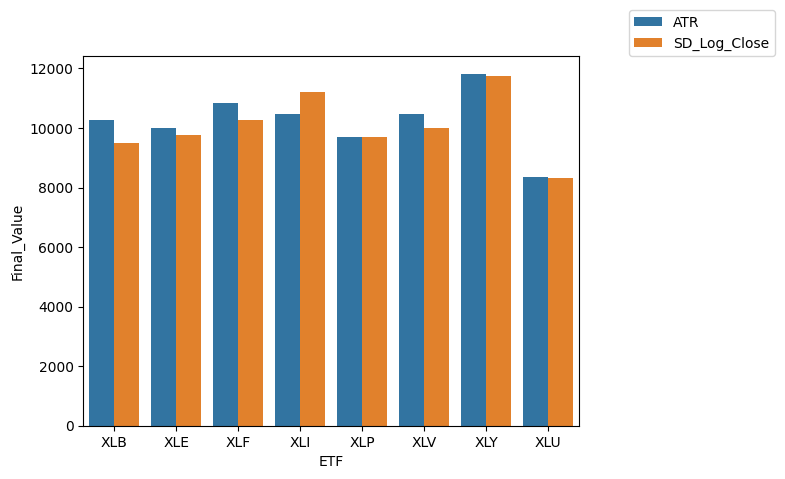

In [6]:
fig2,ax = plt.subplots()
sns.barplot(data=results,x="ETF",y="Final_Value",hue="Metric",ax=ax)
plt.legend(loc=(1.1,1))
fig2.savefig('return_metrics.png')


In [9]:
money_df_passive

,XLB_SD_Log_Close_Passive,XLE_SD_Log_Close_Passive,XLF_SD_Log_Close_Passive,XLI_SD_Log_Close_Passive,XLP_SD_Log_Close_Passive,XLV_SD_Log_Close_Passive,XLY_SD_Log_Close_Passive,XLU_SD_Log_Close_Passive
0,9969.403990,10009.430626,9905.529314,9968.479117,9941.144265,9915.641204,10010.309987,9883.477741
1,10014.686085,9865.613580,9924.979161,9945.823483,9859.019984,9842.117483,10003.436662,9710.188228
2,10093.011871,10060.120240,9891.636566,9985.224586,9786.476868,9825.864871,9877.654822,9550.343591
3,10208.052870,10148.532359,9844.401223,10102.442868,9920.613195,9886.231716,9844.662863,9731.102480
4,10353.689879,10286.455263,10000.000000,10211.780930,9928.825623,9996.904264,10056.361262,9896.922617
...,...,...,...,...,...,...,...,...
210,10550.728185,10058.941412,10450.125035,11239.164697,9834.382699,10516.987849,12431.094921,9405.437705
211,10510.341451,9905.693740,10480.689080,11242.119779,9838.488913,10544.075536,12366.485669,9472.662085
212,10468.730877,9883.296004,10447.346485,11228.329393,9859.019984,10554.910611,12290.191766,9460.711085
213,10450.373271,9989.390546,10491.803279,11115.051221,9969.887763,10740.654748,12176.094577,9598.147595


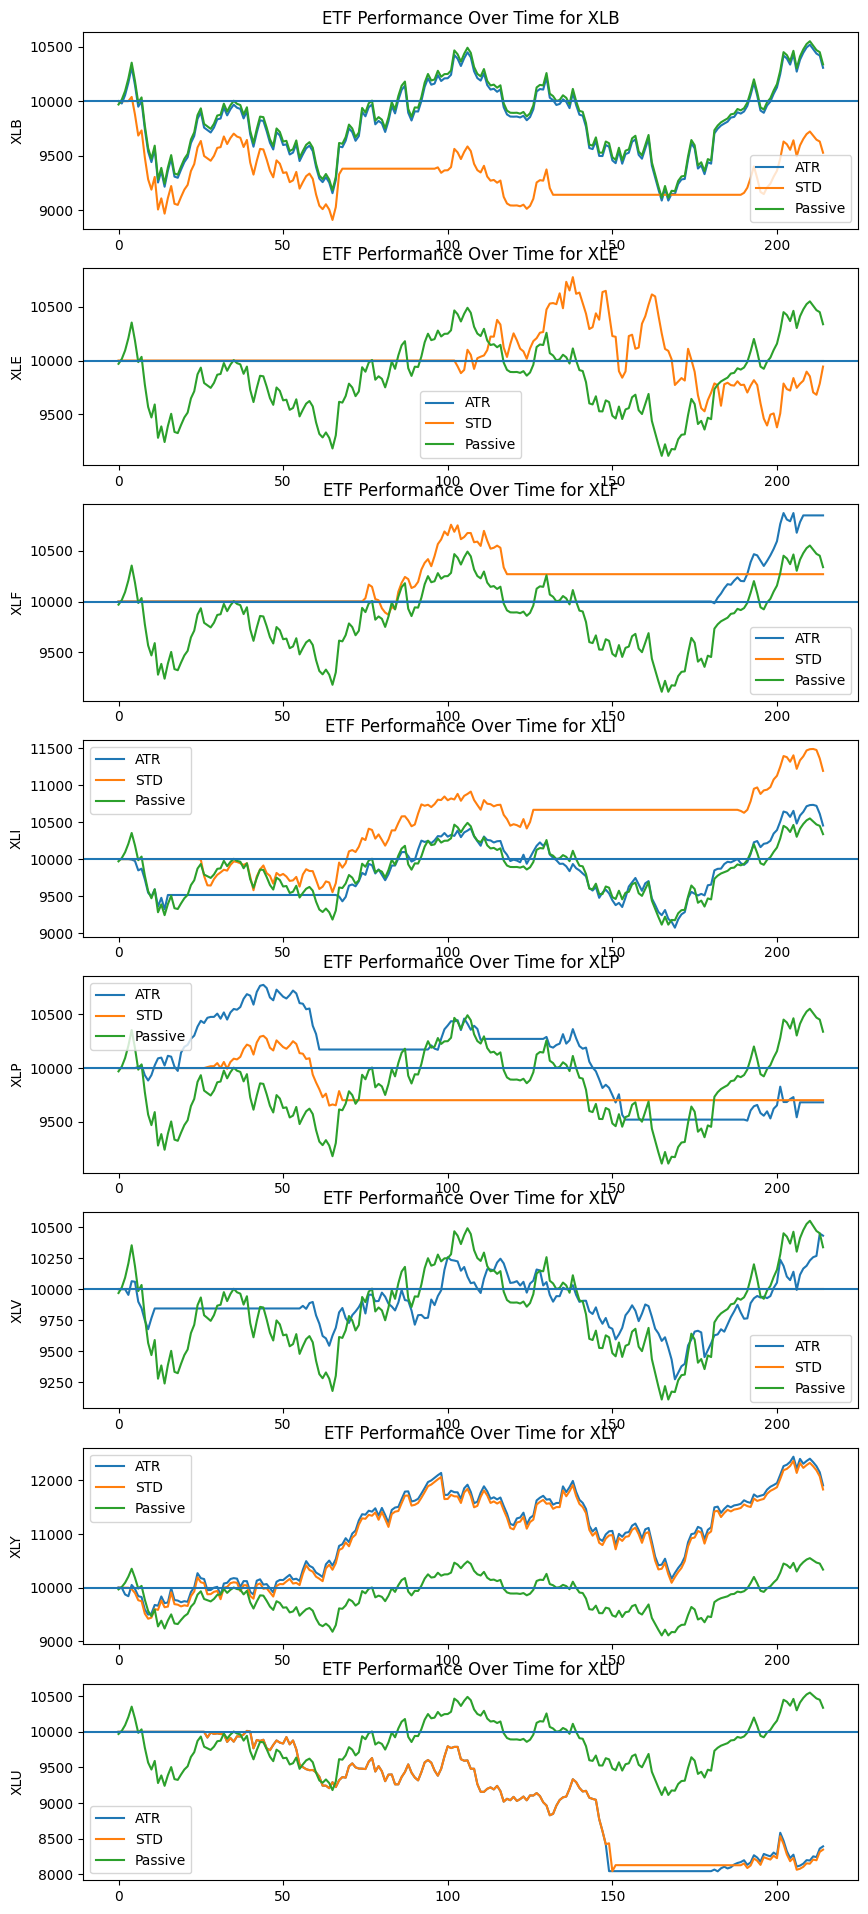

In [14]:
fig3,ax = plt.subplots(len(etfs),1,figsize=(10,24))


for i,etf in enumerate(money_df_atr.columns):
    sns.lineplot(x=range(0, 215), y=money_df_atr[etf], label="ATR", ax=ax[i])
    sns.lineplot(x=range(0,215),y=money_df_std[etf],label="STD",ax=ax[i])
    sns.lineplot(x=range(0,215),y=money_df_passive[f"XLB_SD_Log_Close_Passive"],label="Passive",ax=ax[i])
    ax[i].axhline(10000)
    ax[i].set_title(f"ETF Performance Over Time for {etf}")
plt.legend()  
plt.show()
      




In [10]:
money_df = pd.DataFrame()

money_df['xlb'] = [5,6,7]